In [1]:
!pip install yfinance==0.1.74
!pip install mplcyberpunk
!pip install python-dotenv  

In [2]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

[*********************100%***********************]  5 of 5 completed


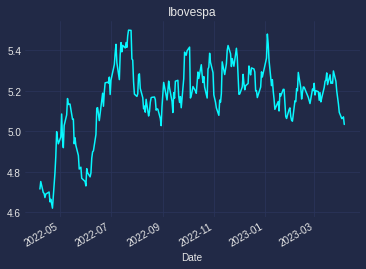

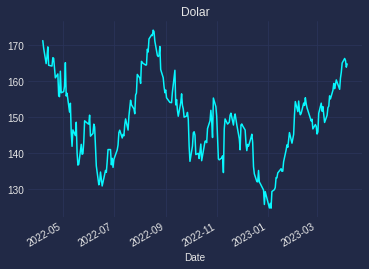

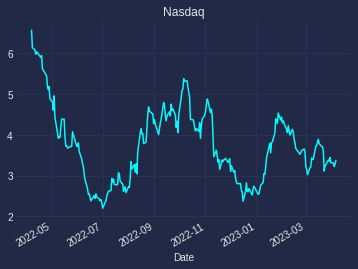

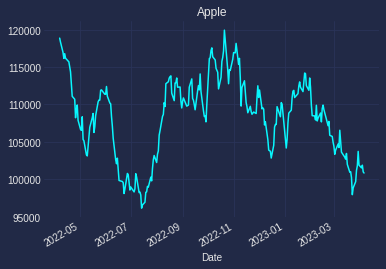

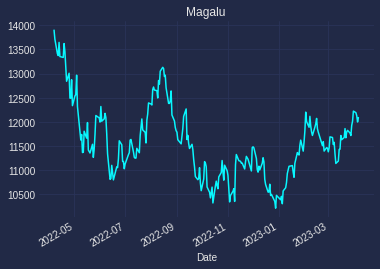

In [3]:
ativos = ["^BVSP", "BRL=X", "^IXIC", "AAPL", "MGLU3.SA"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['Dolar', 'Ibovespa', 'Nasdaq', 'Apple', "Magalu"]

dados_fechamento = dados_fechamento.dropna()


dados_fechamento_anual = dados_fechamento.resample("Y").last()
dados_fechamento_mensal = dados_fechamento.resample("M").last()

retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()


retorno_dia_dolar = round(retorno_no_dia.iloc[-1, 0] * 100, 2)
retorno_dia_ibovespa = round(retorno_no_dia.iloc[-1, 1] * 100, 2)
retorno_dia_nasdaq = round(retorno_no_dia.iloc[-1, 2] * 100, 2)
retorno_dia_apple = round(retorno_no_dia.iloc[-1, 3] * 100, 2)
retorno_dia_magalu = round(retorno_no_dia.iloc[-1, 4] * 100, 2)

retorno_mes_dolar = round(retorno_no_mes.iloc[-1, 0] * 100, 2)
retorno_mes_ibovespa = round(retorno_no_mes.iloc[-1, 1] * 100, 2)
retorno_mes_nasdaq = round(retorno_no_mes.iloc[-1, 2] * 100, 2)
retorno_mes_apple = round(retorno_no_mes.iloc[-1, 3] * 100, 2)
retorno_mes_magalu = round(retorno_no_mes.iloc[-1, 4] * 100, 2)

retorno_ano_dolar = round(retorno_no_ano.iloc[-1, 0] * 100, 2)
retorno_ano_ibovespa = round(retorno_no_ano.iloc[-1, 1] * 100, 2)
retorno_ano_nasdaq = round(retorno_no_ano.iloc[-1, 2] * 100, 2)
retorno_ano_apple = round(retorno_no_ano.iloc[-1, 3] * 100, 2)
retorno_ano_magalu = round(retorno_no_ano.iloc[-1, 4] * 100, 2)

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Ibovespa', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Dolar', use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Nasdaq', use_index = True, legend = False)

plt.title("Nasdaq")

plt.savefig('nasdaq.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Apple', use_index = True, legend = False)

plt.title("Apple")

plt.savefig('apple.png', dpi = 300)

plt.show()

plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Magalu', use_index = True, legend = False)

plt.title("Magalu")

plt.savefig('magalu.png', dpi = 300)

plt.show()

import os
from dotenv import load_dotenv

load_dotenv()

senha = os.environ.get("senha")
email = 'bianor.alvaro12@gmail.com'

msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['From'] = email
#msg['To'] = 'brenno@varos.com.br'
msg['To'] = 'bianor.alvaro12@gmail.com'

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.

Nasdaq:

No ano o Nasdaq está tendo uma rentabilidade de {retorno_ano_nasdaq}%, 
enquanto no mês a rentabilidade é de {retorno_mes_nasdaq}%.

No último dia útil, o fechamento do Nasdaq foi de {retorno_dia_nasdaq}%.

Apple:

No ano a Apple está tendo uma rentabilidade de {retorno_ano_apple}%, 
enquanto no mês a rentabilidade é de {retorno_mes_apple}%.

No último dia útil, o fechamento da Apple foi de {retorno_dia_apple}%.


Magalu:

No ano a Magalu está tendo uma rentabilidade de {retorno_ano_magalu}%, 
enquanto no mês a rentabilidade é de {retorno_mes_magalu}%.

No último dia útil, o fechamento da Magalu foi de {retorno_dia_magalu}%.


Abs,

O futuro programador maromba

''')

with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')
    
with open('nasdaq.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='nasdaq.png')
    
    
with open('apple.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='apple.png')
    
with open('magalu.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='magalu.png')
    
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, senha)
    smtp.send_message(msg)